# MusicBox User Tutorial

Hello, and welcome to the MusicBox user tutorial! Here, we will be covering some basic usages of the MusicBox library.

# What is MusicBox?

MusicBox is a library with a Python API for boxes and columns <b>(what does this mean exactly?)</b> that builds on top of MUSICA, a collection of modeling software, tools, and grids that allow for robust modeling of chemistry in Earth's atmosphere.

# Downloading MusicBox

To install MusicBox onto your device, run

```
pip install acom-music-box
```

Note: Installing MusicBox will automatically install MUSICA, a required dependency of MusicBox that is used throughout this tutorial.

# Importing MusicBox

To import your newly-downloaded MusicBox into a Python file (as well as some other libraries so that this demo can run):

In [ ]:
from acom_music_box import MusicBox, Conditions
import musica.mechanism_configuration as mc
import matplotlib.pyplot as plt

# Defining a System

In MusicBox, a system represents:
* a set of species and their respective phases,
* a set of reactions that the species undergo, and
* the mechanisms that encase these species and reactions.

The system is the fundamental building block of MusicBox and is your main concern when using this library.</br>
The following steps will walk you through:
* creating your own system,
* solving your system, and
* viewing and visualizing your results.</br>

## 1. Defining a Species

A species is simply a reactant or product in a chemical reaction.</br>
<b>(This probably needs a fact-check. For example, are catalysts supported?)</b></br>
You have the freedom to name a species anything in MusicBox, just make sure that it is logical to you.</br>
For extended documentation about the Species class, go [here](https://ncar.github.io/musica/api/python.html#musica.mechanism_configuration.Species).</br>
Here is an example function of a basic Arrhenius reaction:

In [ ]:
def define_species(): # Create each of the species that will be simulated
    X = mc.Species(name="X")
    Y = mc.Species(name="Y")
    Z = mc.Species(name="Z")
    species = {"X": X, "Y": Y, "Z": Z}
    gas = mc.Phase(name="gas", species=list(species.values()))
    return gas, species

The <i>define_system()</i> function creates 3 species called X, Y, and Z and adds them to a dictionary called species.</br>
The variable name and the name of the species are not required to be the same, but it is strongly recommended so that your code is more organized.</br>
Next, a gas object is created to represent the phase of the species and then the gas and species objects are returned.</br>
<b>Note:</b> Returning the gas and species containers is mandatory, as subsequent code relies on the data being bundled in specific object types.

## 2. Defining Reactions

A chemical reaction is a process that results into a set of reactants transforming into a set of products.</br>
To define a reaction in MusicBox:

In [ ]:
def define_reactions(gas, species): # Create the reactions that the species undergo in the
    arr1 = mc.Arrhenius(name="X->Y", A=4.0e-3, C=50, reactants=[species["X"]], products=[species["Y"]], gas_phase=gas)
    arr2 = mc.Arrhenius(name="Y->Z", A=4.0e-3, C=50, reactants=[species["Y"]], products=[species["Z"]], gas_phase=gas)
    rxns = {"X->Y": arr1, "Y->Z": arr2}
    return rxns

The <i>define_reaction()</i> function takes in the gas and species variables returned from the <i>define_system()</i> function.</br>
Using the species and gas variables, the function creates two reactions: arr1 and arr2.</br>
The arr1 variable represents the conversion of the X reacant into the Y product with some pre-defined constants as well.</br>
The arr2 variable is just like arr1, but instead it represents the conversion of the Y reactant into the Z product.</br>
These reactions are then bundled into a dictionary called rxns just like the species before, and it is returned.</br>
<b>Note:</b> MusicBox allows for users to experiment with an array of reaction types.</br>
Go [here](https://ncar.github.io/musica/api/python.html#module-musica.mechanism_configuration) to view a list of supported reactions and their parameters.

## 3. Defining Mechanisms

A mechanism represents a set of species with their respective phases and reactions.</br>
For extended documentation about the Mechanism class, go [here](https://ncar.github.io/musica/api/python.html#musica.mechanism_configuration.Mechanism).</br>
To create a mechanism in MusicBox:

In [ ]:
def define_mechanism(gas, species, rxns): # Create the mechanism that is defined by the species, phases, and reactions
    mechanism = mc.Mechanism(name="tutorial_mechanism", species=list(species.values()), phases=[gas], reactions=list(rxns.values()))
    return mechanism

The <i>define_mechanism()</i> function builds upon the previous two functions, taking in the previously-returned gas, species, and rxn as parameters.</br>
This function simply creates a mechanism variable that represents an instance of the Mechanism class.</br>
The mechanism is first given a name, then the species, gas, and rxns are passed into their respective parameters.</br>
It is then returned from the function.

## 4. Creating a Box Model

Box models allow you to encase your previously-created mechanism and add conditions that can change the reactions' rates over time.</br>
The box model is defined in the MusicBox class, which an instance of must be created so that you can access the functionality of it.</br>
You can also define the length of the simulations and the time steps.</br>
To initialize a new box model:

In [ ]:
def create_box_model(mechanism): # Create the box model that contains the mechanism
    box_model = MusicBox()
    box_model.load_mechanism(mechanism)
    return box_model

The <i>create_box_model()</i> function is straightforward, simply creating an instance of the MusicBox class and then loading the mechanism through the passed-in parameter.</br>
The box_model is then returned from the function.

### 4a. Adding an Initial Condition to Your Box Model

The initial conditions of the model define the environment the mechanism takes place in at the start of the simulation.</br>
Some conditions that are recommended to define for your system include:
* the temperature, measured in Kelvin (K),
* the pressure, measured in Pascals (Pa), and
* the concentration of each of the species, measured in mol/m<sup>3</sup>.

For extended documentation about the Conditions class, go [here](https://ncar.github.io/musica/api/python.html#musica.types.Conditions).</br>
To set the initial conditions of your box model:

In [ ]:
def set_initial_conditions(box_model): # Set the conditions of the box model at time = 0 s
    box_model.initial_conditions = Conditions(
        temperature=298.15, # Units: Kelvin (K)
        pressure=101325.0, # Units: Pascals (Pa)
        species_concentrations={ # Units: mol/m^3
            "X": 3.75,
            "Y": 5.0,
            "Z": 2.5,
        }
    )
    return box_model

The <i>set_initial_conditions()</i> function takes in the box_model as a parameter and calls its initial_conditons function.</br>
In the condition class, you should provide a temperature, pressure, air density (unless you just want it based on the Ideal Gas Law, which is the default), and each of the species' concentrations.</br>
The updated box_model is then returned from the function.

### 4b. Adding Evolving Conditions to Your Box Model

An evolving condition will change the environment of the mechanism at the defined time value (the first value in the function).</br>
These changes can include species concentration, temperature, pressure, et cetera.</br>
To create an evolving condition for your box model:

In [ ]:
def set_evolving_condition(box_model): # Set the box model conditions at the defined time
    box_model.add_evolving_condition(
        100.0, # Units: Seconds (s)
        Conditions(
            temperature=310.0, # Units: Kelvin (K)
            pressure=100100.0 # Units: Pascals (Pa)
        )
    )
    return box_model

The <i>set_evolving_condition()</i> function is similar to the <i>set_initial_conditions()</i> function, with it taking in a box_model as a parameter.</br>
Just like in <i>set_initial_conditions()</i>, a Conditions object is inserted into one of the box_model's function, this time being its <i>add_evolving_condition()</i> function.</br>
However, there is now a new value put at the very beginning of the function that represents the time at which the evolving conditions takes place at.</br>
Once that is all done, the updated box_model is returned from the function.

### 4c. Additional Box Model Configuration

Box models contain some additional configuration options that need to be defined.</br>
These include:
* the simulation length (how long the simulation lasts for),
* the chemistry step time (the number of time steps between each part of the mechanism), and
* the output step time (the number of time steps between each output of the mechanism).

All three of these have seconds as their unit.</br>
To set these configurations for your box model:

In [ ]:
def set_box_model_configuration(box_model): # Set the additional configuration options for the box model
    box_model.box_model_options.simulation_length = 200 # Units: Seconds (s)
    box_model.box_model_options.chem_step_time = 1 # Units: Seconds (s)
    box_model.box_model_options.output_step_time = 20 # Units: Seconds (s)
    return box_model

The <i>set_box_model_parameters()</i> takes in the box_model as a parameters and sets some if its attributes, including:</br>
* <b>simulation_length:</b> the number of time steps that the simulation lasts for,
* <b>chem_step_time:</b> the number of time steps between each simulation calculation, and
* <b>output_step_time:</b> the number of time steps between each output of the model.

The updated box_model is then returned from the function.

## 5. Running and Solving Your Box Model

Now, you are able to run and solve your newly-created box model.</br>
To solve your box model:

In [ ]:
gas, species = define_species()
rxns = define_reactions(gas = gas, species = species)
mechanism = define_mechanism(gas = gas, species = species, rxns = rxns)
box_model = create_box_model(mechanism = mechanism)
box_model.load_mechanism(mechanism)
box_model = set_initial_conditions(box_model = box_model)
box_model = set_evolving_condition(box_model = box_model)
box_model = set_box_model_configuration(box_model = box_model)
df = box_model.solve()

This section takes all the functions built in the previous code cells and runs them all sequentially.</br>
Though, the Tutorial object does need to be created first so that you can access the functions.</br>
Once you run all of the functions in the correct order, your model is ready to be solved, which is done simply by calling the <i>solve()</i> function on your box_model.

## 6. View Outputs and Visualizations

MusicBox supports viewing your simulation's outputs as well as visualizing it.</br>
To view your solved model and a basic visualization of it:

,time.s,ENV.temperature.K,ENV.pressure.Pa,ENV.air number density.mol m-3,CONC.X.mol m-3,CONC.Y.mol m-3,CONC.Z.mol m-3
0,0.0,298.15,101325.0,40.874045,3.750000,5.000000,2.500000
1,20.0,298.15,101325.0,40.874045,3.411490,4.871403,2.967107
2,40.0,298.15,101325.0,40.874045,3.103538,4.725280,3.421182
3,60.0,298.15,101325.0,40.874045,2.823383,4.565844,3.860773
4,80.0,298.15,101325.0,40.874045,2.568519,4.396687,4.284794
5,100.0,298.15,101325.0,40.874045,2.336660,4.220865,4.692475
6,120.0,310.00,100100.0,38.836331,2.127017,4.042117,5.080866
7,140.0,310.00,100100.0,38.836331,1.936183,3.861467,5.452350
8,160.0,310.00,100100.0,38.836331,1.762470,3.680695,5.806834
9,180.0,310.00,100100.0,38.836331,1.604343,3.501278,6.144379


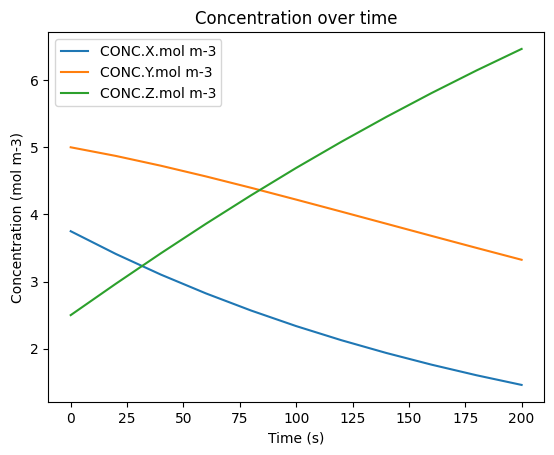

In [ ]:
display(df)
df.plot(x='time.s', y=['CONC.X.mol m-3', 'CONC.Y.mol m-3', 'CONC.Z.mol m-3'], title='Concentration over time', ylabel='Concentration (mol m-3)', xlabel='Time (s)')
plt.show()


This code snippet prints out the output of the simulation that was just ran as well as it utilizing Python's matplotlib library to visualize it.</br>
To do so, the <i>plot()</i> function is called, with the desired independent variable (time) and dependent variables (concentration of each species) being passed in.</br>
The plot is also given a title as well as a label for both the x-axis and the y-axis.</br>
Lastly, the <i>show()</i> function is called so that you can see the plot directly above this text.